<a href="https://colab.research.google.com/github/MrNobody01/ML-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vaderSentiment

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('labeled_data.csv')
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
19966,20407,3,0,3,0,1,RT @sangelina_xo: what's with guys and fat bit...
19967,20408,3,0,3,0,1,RT @santos_brina: I could never mess around wi...
19968,20409,3,2,1,0,0,RT @saramariewelch: Been my main nigguh since ...
19969,20410,3,0,3,0,1,RT @saramariewelch: Can't mean something to so...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.shape

(24783, 7)

In [ ]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [ ]:
df.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [ ]:
import numpy as np
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           False  False        False               False    False  False   
1           False  False        False               False    False  False   
2           False  False        False               False    False  False   
3           False  False        False               False    False  False   
4           False  False        False               False    False  False   
...           ...    ...          ...                 ...      ...    ...   
24778       False  False        False               False    False  False   
24779       False  False        False               False    False  False   
24780       False  False        False               False    False  False   
24781       False  False        False               False    False  False   
24782       False  False        False               False    False  False   

       tweet  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
24778  False  
24779  False  
24780  False  
24781  False  
24782  False  

[24783 rows x 7 columns]>

In [ ]:
df=df.dropna()

In [ ]:
df.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [ ]:
df.shape

(24783, 7)

<Axes: >

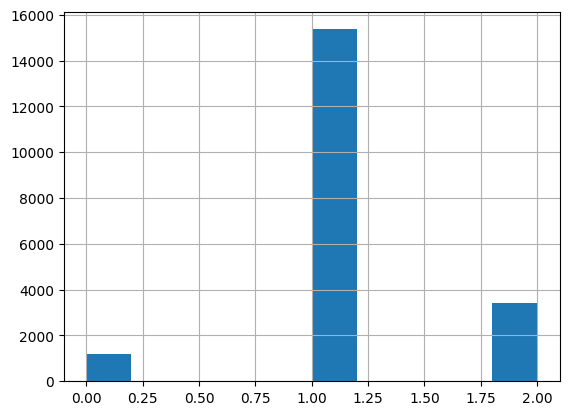

In [5]:
df['class'].hist()

In [9]:
df['class'].value_counts()

class
1    15367
2     3402
0     1202
Name: count, dtype: int64

In [10]:
df


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
19966,20407,3,0,3,0,1,RT @sangelina_xo: what's with guys and fat bit...
19967,20408,3,0,3,0,1,RT @santos_brina: I could never mess around wi...
19968,20409,3,2,1,0,0,RT @saramariewelch: Been my main nigguh since ...
19969,20410,3,0,3,0,1,RT @saramariewelch: Can't mean something to so...


In [16]:
hateSpeech = df[df['class']==0]
offensiveLanguage = df[df['class']==1]
none = df[df['class']==2]

In [17]:
print(hateSpeech.shape)
print(offensiveLanguage.shape)
print(none.shape)

(1202, 7)
(15367, 7)
(3402, 7)


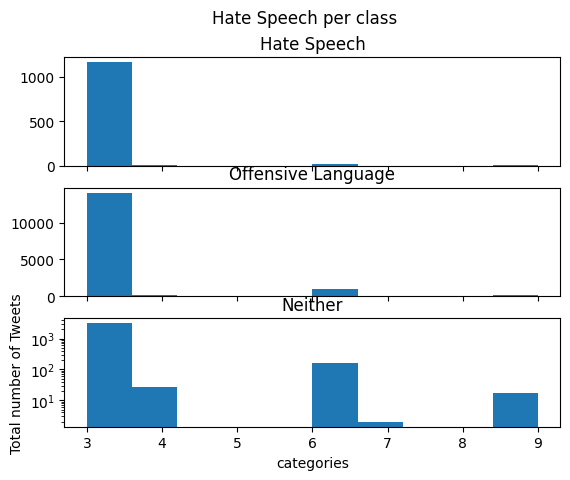

In [42]:
from matplotlib import pyplot as plt
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex = True)
fig.suptitle('Hate Speech per class')

#print("hate:\n", hateSpeech['count'])

ax1.hist(hateSpeech['count'])
ax1.set_title('Hate Speech')

ax2.hist(offensiveLanguage['count'])
ax2.set_title('Offensive Language')

ax3.hist(none['count'])
ax3.set_title('Neither')

plt.xlabel('categories')
plt.ylabel('Total number of Tweets')

plt.yscale('log')
plt.show()